In [3]:
import nltk
import pandas as pd
import numpy as np
import codecs
import PyPDF2
import copy
import pickle

In [2]:
pdfFileObject = open('All_MOUs.pdf', 'rb')
pdfReader = PyPDF2.PdfFileReader(pdfFileObject)
count = pdfReader.numPages
myPdf_raw = dict()
for i in range(16, count):
    page = pdfReader.getPage(i)
    myPdf_raw[i] = page.extractText()

In [4]:
myPdf_copy = copy.deepcopy(myPdf_raw)
print(len(myPdf_copy)) #the ouput is 7398 instead of 7414 because the 16 pages don't have any text (7414-16=7398)

7398


In [5]:
for key in myPdf_copy:
    myPdf_copy[key] = ' '.join(myPdf_copy[key].split()).lower()

In [6]:
myData = pd.DataFrame.from_dict(myPdf_copy, orient='index')
myData.columns= ['content']
myData['compensation'] = 0
myData.head()
myData.tail()

,content,compensation
7409,city of los angeles class code/title and mou n...,0
7410,city of los angeles class code/title and mou n...,0
7411,city of los angeles general manager salary ran...,0
7412,city of los angeles general manager salary ran...,0
7413,city of los angeles general manager salary ran...,0


In [7]:
myData.loc[myData.index[47:58], ['compensation']] = 1
myData.loc[myData.index[175:188], ['compensation']] = 1
myData.loc[myData.index[271:280], ['compensation']] = 1
myData.loc[myData.index[788:801], ['compensation']] = 1
myData.loc[myData.index[895:909], ['compensation']] = 1
myData.loc[myData.index[1067:1082], ['compensation']] = 1
myData.loc[myData.index[1150:1163], ['compensation']] = 1
myData.loc[myData.index[1213:1221], ['compensation']] = 1
myData.loc[myData.index[1287:1293], ['compensation']] = 1
myData.loc[myData.index[1422:1427], ['compensation']] = 1
myData.loc[myData.index[1480:1485], ['compensation']] = 1
myData.loc[myData.index[1620:1633], ['compensation']] = 1
myData.loc[myData.index[1708:1718], ['compensation']] = 1
myData.loc[myData.index[1808:1819], ['compensation']] = 1
myData.loc[myData.index[1885:1898], ['compensation']] = 1
myData.loc[myData.index[2406:2416], ['compensation']] = 1
myData.loc[myData.index[2495:2508], ['compensation']] = 1
myData.loc[myData.index[2661:2668], ['compensation']] = 1
myData.loc[myData.index[2426:2733], ['compensation']] = 1
myData.loc[myData.index[2842:2854], ['compensation']] = 1
myData.loc[myData.index[2933:2945], ['compensation']] = 1
myData.loc[myData.index[3089:3100], ['compensation']] = 1
myData.loc[myData.index[3172:3183], ['compensation']] = 1
myData.loc[myData.index[3288:3297], ['compensation']] = 1
myData.loc[myData.index[3359:3370], ['compensation']] = 1
myData.loc[myData.index[3501:3514], ['compensation']] = 1
myData.loc[myData.index[3582:3592], ['compensation']] = 1
myData.loc[myData.index[3676:3688], ['compensation']] = 1
myData.loc[myData.index[3762:3775], ['compensation']] = 1
myData.loc[myData.index[3908:3921], ['compensation']] = 1
myData.loc[myData.index[4014:4028], ['compensation']] = 1
myData.loc[myData.index[4111:4124], ['compensation']] = 1
myData.loc[myData.index[4248:4261], ['compensation']] = 1
myData.loc[myData.index[4351:4364], ['compensation']] = 1
myData.loc[myData.index[4494:4507], ['compensation']] = 1
myData.loc[myData.index[4532:4534], ['compensation']] = 1
myData.loc[myData.index[4897:4905], ['compensation']] = 1
myData.loc[myData.index[5055:5063], ['compensation']] = 1
myData.loc[myData.index[5218:5221], ['compensation']] = 1
myData.loc[myData.index[5271:5275], ['compensation']] = 1
myData.loc[myData.index[5457:5463], ['compensation']] = 1
myData.loc[myData.index[5504:5510], ['compensation']] = 1
myData.loc[myData.index[5578:5584], ['compensation']] = 1
myData.loc[myData.index[5613:5622], ['compensation']] = 1
myData.loc[myData.index[5832:5837], ['compensation']] = 1
myData.loc[myData.index[6161:6164], ['compensation']] = 1
myData.loc[myData.index[6216:6219], ['compensation']] = 1
myData.loc[myData.index[6826:6832], ['compensation']] = 1
myData.loc[myData.index[6902:6907], ['compensation']] = 1
myData.loc[myData.index[6975:6978], ['compensation']] = 1
myData.loc[myData.index[7015:7022], ['compensation']] = 1
myData.loc[myData.index[7101:7105], ['compensation']] = 1
myData.loc[myData.index[7144:7152], ['compensation']] = 1
myData.loc[myData.index[7196:7201], ['compensation']] = 1

In [53]:
myData.to_csv('LAData.csv', encoding='utf-8')
myData_clean = pd.read_csv('LAData.csv', index_col = 'pages', names = ['pages', 'content', 'compensation'], header=0)
myData_clean.head()
myData_clean.describe()
myData_clean['content'] = myData_clean['content'].astype(str)
myData_clean.dtypes

content         object
compensation     int64
dtype: object

In [59]:
from nltk.tokenize import RegexpTokenizer
from ast import literal_eval

tokenizer = RegexpTokenizer(r'[A-Za-z]+|\$[\d\.]+|[\d\.]+\%')

myData_clean['tokens'] = myData_clean['content'].apply(tokenizer.tokenize)

myData_clean.head()

,content,compensation,tokens
pages,,,
16,memorandum of understanding no. 1 for submissi...,0,"[memorandum, of, understanding, no, for, submi..."
17,i mou 01 7/2/2013 œ 6/30/2016 table of content...,0,"[i, mou, table, of, contents, page, general, p..."
18,ii mou 01 7/2/2013 œ 6/22/2019 table of conten...,0,"[ii, mou, table, of, contents, page, work, sch..."
19,iii mou 01 7/2/2013 œ 6/22/2019 table of conte...,0,"[iii, mou, table, of, contents, page, salary, ..."
20,1 mou01 7/2/2013 œ 6/30/2016 article 1.0 gener...,0,"[mou, article, general, provision, article, re..."


In [65]:
myData_clean.to_csv('LAData_tokens.csv', encoding='utf-8')
LAData_tokens = pd.read_csv('LAData_tokens.csv', index_col = 'pages', names = ['pages', 'content', 'compensation', 'tokens'], header=0)
LAData_tokens['tokens'] = LAData_tokens['tokens'].apply(literal_eval)
LAData_tokens.head()
#LAData_tokens.describe()
#LAData_tokens.dtypes

,content,compensation,tokens
pages,,,
16,memorandum of understanding no. 1 for submissi...,0,"[memorandum, understanding, submission, city, ..."
17,i mou 01 7/2/2013 œ 6/30/2016 table of content...,0,"[i, mou, table, of, contents, page, general, p..."
18,ii mou 01 7/2/2013 œ 6/22/2019 table of conten...,0,"[ii, mou, table, of, contents, page, work, sch..."
19,iii mou 01 7/2/2013 œ 6/22/2019 table of conte...,0,"[iii, mou, table, of, contents, page, salary, ..."
20,1 mou01 7/2/2013 œ 6/30/2016 article 1.0 gener...,0,"[mou, article, general, provision, article, re..."


In [66]:
from nltk.corpus import stopwords

LAData_tokens['tokens'] = LAData_tokens['tokens'].apply(lambda x: [word for word in x if word not in stopwords.words('english')])
LAData_tokens.head()

In [67]:
LAData_tokens.to_csv('LAData_nosw.csv', encoding='utf-8')
LAData_nosw = pd.read_csv('LAData_nosw.csv', index_col = 'pages', names = ['pages', 'content', 'compensation', 'tokens'], header=0)
LAData_nosw['tokens'] = LAData_nosw['tokens'].apply(literal_eval)
LAData_nosw.head()
#LAData_nosw.describe()
#LAData_nosw.dtypes

,content,compensation,tokens
pages,,,
16,memorandum of understanding no. 1 for submissi...,0,"[memorandum, understanding, submission, city, ..."
17,i mou 01 7/2/2013 œ 6/30/2016 table of content...,0,"[mou, table, contents, page, general, provisio..."
18,ii mou 01 7/2/2013 œ 6/22/2019 table of conten...,0,"[ii, mou, table, contents, page, work, schedul..."
19,iii mou 01 7/2/2013 œ 6/22/2019 table of conte...,0,"[iii, mou, table, contents, page, salary, note..."
20,1 mou01 7/2/2013 œ 6/30/2016 article 1.0 gener...,0,"[mou, article, general, provision, article, re..."


In [68]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

LAData_nosw['stemm'] = LAData_nosw['tokens'].apply(lambda x : [stemmer.stem(item) for item in x])
LAData_nosw.head()

,content,compensation,tokens,stemm
pages,,,,
16,memorandum of understanding no. 1 for submissi...,0,"[memorandum, understanding, submission, city, ...","[memorandum, understand, submiss, citi, counci..."
17,i mou 01 7/2/2013 œ 6/30/2016 table of content...,0,"[mou, table, contents, page, general, provisio...","[mou, tabl, content, page, gener, provis, reco..."
18,ii mou 01 7/2/2013 œ 6/22/2019 table of conten...,0,"[ii, mou, table, contents, page, work, schedul...","[ii, mou, tabl, content, page, work, schedul, ..."
19,iii mou 01 7/2/2013 œ 6/22/2019 table of conte...,0,"[iii, mou, table, contents, page, salary, note...","[iii, mou, tabl, content, page, salari, note, ..."
20,1 mou01 7/2/2013 œ 6/30/2016 article 1.0 gener...,0,"[mou, article, general, provision, article, re...","[mou, articl, gener, provis, articl, recognit,..."


In [110]:
LAData_nosw.to_csv('LAData_stemm.csv', encoding='utf-8')
LAData_stemm = pd.read_csv('LAData_stemm.csv', index_col = 'pages', names = ['pages', 'content', 'compensation', 'tokens', 'stemm'], header=0)
LAData_stemm['tokens'] = LAData_stemm['tokens'].apply(literal_eval)
LAData_stemm['stemm'] = LAData_stemm['stemm'].apply(literal_eval)
#LAData_stemm.head()
#LAData_stemm.describe()
#LAData_stemm.dtypes

In [119]:
all_words = [word for tokens in LAData_stemm['tokens'] for word in tokens]
vocab = sorted(set(all_words))
#print("%s words total, with a vocabulary size of %s" % (len(all_words), len(vocab)))
print("Tokens:", len(all_words))
print("Vocabulary:", len(vocab))

Tokens: 1265572
Vocabulary: 25780


[('employe', 38069), ('shall', 31803), ('time', 14685), ('citi', 12852), ('leav', 12843), ('manag', 12160), ('day', 11321), ('work', 10799), ('articl', 10750), ('mou', 10357), ('hour', 9328), ('may', 7898), ('period', 7676), ('servic', 7256), ('pay', 7207), ('step', 6846), ('depart', 6781), ('provid', 6767), ('grievanc', 6508), ('ii', 6428), ('salari', 6406), ('compens', 5954), ('bw', 5856), ('offic', 5610), ('union', 5601), ('receiv', 5596), ('provis', 5574), ('section', 5495), ('unit', 5292), ('b', 5148), ('assign', 4978), ('oper', 4796), ('supervisor', 4790), ('rate', 4777), ('within', 4758), ('c', 4639), ('request', 4596), ('one', 4591), ('date', 4571), ('follow', 4527), ('benefit', 4521), ('parti', 4490), ('member', 4453), ('requir', 4408), ('e', 4342), ('effect', 4297), ('use', 4266), ('year', 4125), ('schedul', 4102), ('class', 4027)]


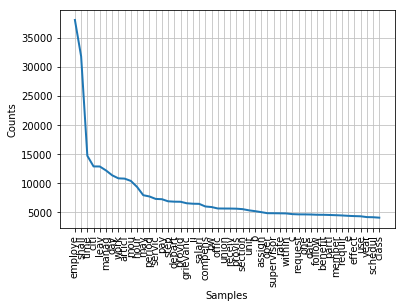

In [117]:
stemm_words = [word for tokens in LAData_stemm['stemm'] for word in tokens]
freq_dist = nltk.FreqDist(stemm_words)
print(freq_dist.most_common(50))
freq_dist.plot(50)

In [96]:
'''new_contract_first_page = list()
for key, value in myPdf_copy.items():
    if 'this memorandum of understanding made' in value:
        new_contract_first_page.append(key)'''  

'''print(len(new_contract_first_page))'''

'''print(new_contract_first_page)'''

'''new_contract_first_page.append(5469-1) #not added automatically due to junmple considered as space (un derstanding)
new_contract_first_page.append(5930-1) #not added automtically due to image input (not uncoded)
new_contract_first_page.append(6997-1) #not added automtically due to image input (not uncoded)
print(len(new_contract_first_page))'''

'''new_contract_first_page.sort()
print(new_contract_first_page)'''

'''myPdf_By_Contract = dict()
for i, element in enumerate(new_contract_first_page):
    if i < len(new_contract_first_page)-1:
        myPdf_By_Contract[i] = [myPdf_copy[x] for x in range(element, new_contract_first_page[i+1])]
myPdf_By_Contract[i] = [myPdf_copy[x] for x in (range(element, len(myPdf_copy)))]'''

'myPdf_By_Contract = dict()\nfor i, element in enumerate(new_contract_first_page):\n    if i < len(new_contract_first_page)-1:\n        myPdf_By_Contract[i] = [myPdf_copy[x] for x in range(element, new_contract_first_page[i+1])]\nmyPdf_By_Contract[i] = [myPdf_copy[x] for x in (range(element, len(myPdf_copy)))]'

In [200]:
'''from nltk import pos_tag
pos_tokens = list()
for index in range(len(tokens)):
    pos_tokens.append(nltk.pos_tag(tokens[index]))
pos_tokens[0][0]'''

'''from nltk.corpus import wordnet

def get_wordnet_pos(treebank_tag):

    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return '' '''

'''poses = [pos[1] for pos in pos_tokens[0]]
poses = set(poses)
poses'''

'''from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
lemmatise = list()
for i in range(len(pos_tokens)):
    for j in range(i):
        lemmatise.append(lemmatizer.lemmatize(pos_tokens[i][j][0], get_wordnet_pos(pos_tokens[i][j][1])))'''

'from nltk.stem import WordNetLemmatizer\n\nlemmatizer = WordNetLemmatizer()\nlemmatise = list()\nfor i in range(len(pos_tokens)):\n    for j in range(i):\n        lemmatise.append(lemmatizer.lemmatize(pos_tokens[i][j][0], get_wordnet_pos(pos_tokens[i][j][1])))'